# Midterm Project - World Bank IBRD Loan Statements 

The source for the main dataset used in this project can be found here: https://finances.worldbank.org/Loans-and-Credits/IBRD-Statement-Of-Loans-Historical-Data/zucq-nrc3.

The World Bank has two main branches that provide loans to countries for development: the International Bank for Reconstruction and Development (IBRD) and the International Development Association (IDA). This dataset enumerates IBRD loan data only since 1947. 

Access is free and open to the public and does not violate any laws. A preliminary google search shows that there are some analyses on World Bank loan trends, but this analysis focuses on countries' loan repayment behavior. Specifically, I focus on <b>how income level of countries impacts the speed of loan repayment?</b>

My background in economics provides me with knowledge to analyze this data and <b> I hypothesize that high income countries make their first loan repayment sooner than middle or low income countries.</b> 

The dataset is made up of 1,005,407 rows and 33 columns and is approximately 369MB.

Supplemental data on GNI and income level can be found here: https://datatopics.worldbank.org/world-development-indicators/stories/the-classification-of-countries-by-income.html.

In [1]:
#Import necessary packages 
import pandas as pd
import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Data:
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————

In [2]:
df = pd.read_csv('IBRD_Statement_Of_Loans_-_Historical_Data.csv', low_memory=False)

In [3]:
#Determine rows and columns
print('Rows: ',df.shape[0],'\nColumns: ',df.shape[1])

Rows:  1005407 
Columns:  33


In [4]:
#Let's take a look at the actual data
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,7/31/20 0:00,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00,5/9/47 0:00,6/9/47 0:00,12/31/47 0:00,NaN
1,7/31/20 0:00,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00,8/7/47 0:00,9/11/47 0:00,3/31/48 0:00,NaN
2,7/31/20 0:00,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,5/25/48 0:00,8/7/47 0:00,6/1/48 0:00,6/30/48 0:00,NaN
3,7/31/20 0:00,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00,8/22/47 0:00,10/17/47 0:00,3/31/49 0:00,NaN
4,7/31/20 0:00,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00,8/28/47 0:00,10/24/47 0:00,3/31/49 0:00,NaN


In [5]:
df.tail()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
1005402,1/31/21 0:00,IBRDS0160,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,NPL,Fully Cancelled,0.00,NaN,P004894,SN METAL TECHNICAL ASST,20000000.0,20000000.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,5/15/84 0:00,11/15/89 0:00,NaN,11/13/79 0:00,11/13/79 0:00,6/30/83 0:00,NaN
1005403,1/31/21 0:00,IBRDS0170,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,NPL,Fully Repaid,7.95,NaN,P004895,WATER SUP & ENG.,5000000.0,1388308.92,0.0,3611691.08,3611691.08,0.0,0.00,0.00,0.0,0.0,0.0,0.0,11/15/83 0:00,11/15/89 0:00,2/14/80 0:00,1/15/80 0:00,9/17/80 0:00,12/31/84 0:00,11/13/85 0:00
1005404,1/31/21 0:00,IBRDS0180,MIDDLE EAST AND NORTH AFRICA,MA,Morocco,ONAREP,MA,Morocco,NPL,Fully Repaid,8.25,NaN,P005392,PETROLEUM EXPLORATION I,50000000.0,103917.29,0.0,49896082.71,49896082.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,11/1/84 0:00,5/1/97 0:00,5/19/80 0:00,4/15/80 0:00,10/24/80 0:00,6/30/84 0:00,NaN
1005405,1/31/21 0:00,IBRDS0190,LATIN AMERICA AND CARIBBEAN,PE,Peru,EMPRESA SIDERURGICA DEL PERU,PE,Peru,NPL,Fully Repaid,8.25,NaN,P007969,SIDERPERU TA,5000000.0,3643143.25,0.0,1356856.75,1356856.75,0.0,0.01,0.01,0.0,0.0,0.0,0.0,12/15/84 0:00,12/15/90 0:00,12/15/80 0:00,7/15/80 0:00,4/16/81 0:00,6/30/86 0:00,10/11/83 0:00
1005406,1/31/21 0:00,IBRDS0200,LATIN AMERICA AND CARIBBEAN,AR,Argentina,Ministry of Treasury,AR,Argentina,CPL,Fully Repaid,9.25,NaN,P005939,COAL EXPLORATION,10000000.0,0.00,0.0,10000000.00,10000000.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,6/1/85 0:00,12/1/90 0:00,5/13/81 0:00,12/9/80 0:00,4/7/82 0:00,2/28/87 0:00,NaN


## Clean the Data

### Data Cleaning: Duplicate and Irrelevant Data 
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————

Since we want to focus on loans that were successfully repaid, we will only need rows and columns that pertain to fully repaid loans. We can disregard other data for this analysis.

#### 1. We want to makes sure we only have one row for each loan. 

In [6]:
df['Loan Number'].value_counts()

IBRD3302A    120
IBRD15660    120
IBRD3156A    120
IBRD31160    120
IBRD31330    120
            ... 
IBRD92050      1
IBRD91980      1
IBRD91970      1
IBRD92010      1
IBRD83680      1
Name: Loan Number, Length: 10086, dtype: int64

For some loans, it appears that there are multiple entries. Let's look at why this be.

In [7]:
df.loc[df['Loan Number'] == 'IBRD21070'].head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
2441,7/31/20 0:00,IBRD21070,LATIN AMERICA AND CARIBBEAN,JM,Jamaica,MINISTRY OF FINANCE & PLANNING,JM,Jamaica,CPL,Fully Repaid,11.6,NaN,P007428,KINGSTON FREE ZONE,13500000.0,5877080.24,0.0,7622919.76,7622919.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/15/86 0:00,4/15/99 0:00,3/23/82 0:00,3/23/82 0:00,8/16/82 0:00,12/31/90 0:00,5/10/91 0:00
11464,8/31/20 0:00,IBRD21070,LATIN AMERICA AND CARIBBEAN,JM,Jamaica,MINISTRY OF FINANCE & PLANNING,JM,Jamaica,CPL,Fully Repaid,11.6,NaN,P007428,KINGSTON FREE ZONE,13500000.0,5877080.24,0.0,7622919.76,7622919.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/15/86 0:00,4/15/99 0:00,3/23/82 0:00,3/23/82 0:00,8/16/82 0:00,12/31/90 0:00,5/10/91 0:00
19661,6/30/20 0:00,IBRD21070,LATIN AMERICA AND CARIBBEAN,JM,Jamaica,MINISTRY OF FINANCE & PLANNING,JM,Jamaica,CPL,Fully Repaid,11.6,NaN,P007428,KINGSTON FREE ZONE,13500000.0,5877080.24,0.0,7622919.76,7622919.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/15/86 0:00,4/15/99 0:00,3/23/82 0:00,3/23/82 0:00,8/16/82 0:00,12/31/90 0:00,5/10/91 0:00
202994,4/30/11 0:00,IBRD21070,LATIN AMERICA AND CARIBBEAN,JM,Jamaica,MINISTRY OF FINANCE & PLANNING,JM,Jamaica,POOL LOAN,Repaid,11.6,NaN,P007428,KINGSTON FREE ZONE,13500000.0,5877080.24,0.0,7622919.76,7622919.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/15/86 0:00,4/15/99 0:00,3/23/82 0:00,3/23/82 0:00,8/16/82 0:00,12/31/90 0:00,5/10/91 0:00
202995,5/31/11 0:00,IBRD21070,LATIN AMERICA AND CARIBBEAN,JM,Jamaica,MINISTRY OF FINANCE & PLANNING,JM,Jamaica,POOL LOAN,Repaid,11.6,NaN,P007428,KINGSTON FREE ZONE,13500000.0,5877080.24,0.0,7622919.76,7622919.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/15/86 0:00,4/15/99 0:00,3/23/82 0:00,3/23/82 0:00,8/16/82 0:00,12/31/90 0:00,5/10/91 0:00


##### Eliminate duplicates due to montly updates that repeat rows

All the data is the same in these rows, expect for the 'End of Period'. It looks like this column simply identifies a monthly update to the dataset. If none of the data in other columns is actually updating for each loan, we can drop these duplicates.

In [8]:
df1 = df.drop(columns=['End of Period']).copy()
df2 = df1.drop_duplicates().copy()
df2.head()

,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00,5/9/47 0:00,6/9/47 0:00,12/31/47 0:00,NaN
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00,8/7/47 0:00,9/11/47 0:00,3/31/48 0:00,NaN
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,5/25/48 0:00,8/7/47 0:00,6/1/48 0:00,6/30/48 0:00,NaN
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00,8/22/47 0:00,10/17/47 0:00,3/31/49 0:00,NaN
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00,8/28/47 0:00,10/24/47 0:00,3/31/49 0:00,NaN


When we check again to see if each unique loan only appears once, it looks like we still have duplicates. 

In [9]:
df2['Loan Number'].value_counts()

IBRD30790    120
IBRD48730    119
IBRD76990    119
IBRD75330    119
IBRD75320    119
            ... 
IBRD90490      1
IBRD6370       1
IBRD2530       1
IBRD4800       1
IBRD91880      1
Name: Loan Number, Length: 10086, dtype: int64

In [10]:
df2.loc[df['Loan Number'] == 'IBRD30790'][:5]

,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
3877,IBRD30790,AFRICA EAST,ZW,Zimbabwe,MINISTRY OF FINANCE & ECO DEVELOPMENT,ZW,Zimbabwe,CPL,Repaying,6.42,NaN,P003294,URBAN II,80000000.0,3072933.97,0.0,76927066.03,26550000.0,50377066.03,390756.31,50767822.34,0.0,0.0,0.0,50377066.03,10/1/94 0:00,4/1/09 0:00,8/7/90 0:00,6/1/89 0:00,1/29/91 0:00,12/31/99 0:00,6/29/00 0:00
12896,IBRD30790,AFRICA EAST,ZW,Zimbabwe,MINISTRY OF FINANCE & ECO DEVELOPMENT,ZW,Zimbabwe,CPL,Repaying,6.42,NaN,P003294,URBAN II,80000000.0,3072933.97,0.0,76927066.03,26550000.0,50377066.03,434670.32,50811736.35,0.0,0.0,0.0,50377066.03,10/1/94 0:00,4/1/09 0:00,8/7/90 0:00,6/1/89 0:00,1/29/91 0:00,12/31/99 0:00,6/29/00 0:00
21097,IBRD30790,AFRICA,ZW,Zimbabwe,MINISTRY OF FINANCE & ECO DEVELOPMENT,ZW,Zimbabwe,CPL,Repaying,6.42,NaN,P003294,URBAN II,80000000.0,3072933.97,0.0,76927066.03,26550000.0,50377066.03,-14895.37,50362170.66,0.0,0.0,0.0,50377066.03,10/1/94 0:00,4/1/09 0:00,8/7/90 0:00,6/1/89 0:00,1/29/91 0:00,12/31/99 0:00,6/29/00 0:00
307958,IBRD30790,AFRICA,ZW,Zimbabwe,MINISTRY OF FINANCE,ZW,Zimbabwe,POOL LOAN,Disbursed,7.99,NaN,P003294,URBAN II,80000000.0,3072933.97,0.0,76927066.03,24160000.0,52767066.03,2039834.50,54806900.53,0.0,0.0,0.0,52767066.03,10/1/94 0:00,4/1/09 0:00,8/7/90 0:00,6/1/89 0:00,1/29/91 0:00,12/31/99 0:00,6/29/00 0:00
307959,IBRD30790,AFRICA,ZW,Zimbabwe,MINISTRY OF FINANCE,ZW,Zimbabwe,POOL LOAN,Disbursed,7.99,NaN,P003294,URBAN II,80000000.0,3072933.97,0.0,76927066.03,24160000.0,52767066.03,1751076.22,54518142.25,0.0,0.0,0.0,52767066.03,10/1/94 0:00,4/1/09 0:00,8/7/90 0:00,6/1/89 0:00,1/29/91 0:00,12/31/99 0:00,6/29/00 0:00


##### Eliminate duplicates due to changes in loan status, obligation, and exchange rate changes during disbursement

These duplicates exist because the status of the loan changes as the country is approved, as the loan is being disbursed, and then as the country repays the loan. The borrower's obligation and exchange adjustment (variation in the borrower's obligation according to the exchange rate at the time of recording) also fluctuate by row in this dataset, but this is only relevant when countries are actively repaying.

Since we want to focus on loans that have been successfully repaid (where borrower's obligation = 0), we can ignore this variation.

Thus, to resolve these duplicates we want only rows with a unique combination of Loan Number and Loan Status.

In [11]:
unique_loans_df = df2.drop_duplicates(subset=['Loan Number', 'Loan Status']).copy()
unique_loans_df.head()

,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00,5/9/47 0:00,6/9/47 0:00,12/31/47 0:00,NaN
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00,8/7/47 0:00,9/11/47 0:00,3/31/48 0:00,NaN
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,5/25/48 0:00,8/7/47 0:00,6/1/48 0:00,6/30/48 0:00,NaN
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00,8/22/47 0:00,10/17/47 0:00,3/31/49 0:00,NaN
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00,8/28/47 0:00,10/24/47 0:00,3/31/49 0:00,NaN


##### Eliminate duplicates due to non-standard loan number naming conventions

There are also duplicates of some loans that have been input with a non-standard loan number. Standard IBRD loan numbers should consist of 'IBRD' followed by 5 other characters. In some cases the leading zeros of the loan number have been left off. Let's drop such cases.

In [12]:
unique_loans_df.loc[unique_loans_df['Loan Number'].str.contains(r'^IBRD\w{4}$')][:5]

,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
102780,IBRD1000,Africa,CI,Cote d'Ivoire,MINISTERE DE L'ECONOMIE,FR,France,NON POOL,Repaid,5.0,NaN,P001094,RAILWAYS,7500000.0,408432.88,0.0,7091567.12,4493567.12,0.0,0.00,0.00,2598000.00,2598000.00,0.0,0.0,12/1/56 0:00,6/1/66 0:00,6/10/54 0:00,6/8/54 0:00,10/1/54 0:00,12/31/56 0:00,NaN
104202,IBRD1010,South Asia,LK,Sri Lanka,Central Bank of Sri Lanka,LK,Sri Lanka,NON POOL,Repaid,5.0,NaN,P010005,POWER,19110000.0,3210590.52,0.0,15899409.48,15576409.50,0.0,-0.01,-0.01,322999.98,322999.98,0.0,0.0,1/15/59 0:00,7/15/79 0:00,7/9/54 0:00,6/17/54 0:00,7/31/54 0:00,12/31/64 0:00,NaN
105013,IBRD1020,Europe and Central Asia,AT,Austria,OESTERREICHISCHE ELEK A. G.,NaN,NaN,NON POOL,Repaid,5.0,NaN,P037349,POWER,12000000.0,0.00,0.0,12000000.00,5757176.28,0.0,-0.01,-0.01,6242823.72,6242823.72,0.0,0.0,7/15/59 0:00,7/15/79 0:00,7/19/54 0:00,6/16/54 0:00,6/8/55 0:00,3/31/59 0:00,NaN
106117,IBRD1030,Latin America and Caribbean,MX,Mexico,Secretaria de Hacienda Y Credito Publico,MX,Mexico,NON POOL,Repaid,5.0,NaN,P007502,PACIFIC RAILWAY,61000000.0,0.00,0.0,61000000.00,52554000.00,0.0,0.00,0.00,8446000.00,8446000.00,0.0,0.0,6/1/59 0:00,12/1/69 0:00,8/24/54 0:00,8/20/54 0:00,12/28/54 0:00,12/31/59 0:00,NaN
106997,IBRD1040,Latin America and Caribbean,SV,El Salvador,MINISTRY OF PLANNING AND COORDINATION,SV,El Salvador,NON POOL,Repaid,5.0,NaN,P007138,COSTAL HIGHWAY,11100000.0,0.00,0.0,11100000.00,10850000.00,0.0,0.00,0.00,250000.00,250000.00,0.0,0.0,4/15/59 0:00,10/15/66 0:00,10/12/54 0:00,10/12/54 0:00,1/13/55 0:00,9/30/61 0:00,NaN


In [13]:
#filter out the rows with non-standard loan numbers
unique_loans_df = unique_loans_df.loc[unique_loans_df['Loan Number'].str.contains(r'^IBRD\w{5}$')].copy()

#### 2. Drop irrelevant columns.
We do not need the following columns:
- Borrower
- Guarantor Country Code
- Guarantor
- Loan Type
- Currency of Commitment
- Project ID
- Project Name 
- Agreement Signing Date
- Effective Date
- Closed Date
- Last disbursement

In [14]:
unique_loans_df = unique_loans_df.drop(columns=['Borrower','Guarantor Country Code', 'Guarantor', 'Loan Type', 'Currency of Commitment', 'Project ID', 'Project Name ', 'Agreement Signing Date','Effective Date (Most Recent)','Closed Date (Most Recent)', 'Last Disbursement Date']).copy()
unique_loans_df.head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Board Approval Date
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Fully Repaid,4.25,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Fully Repaid,4.25,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Fully Repaid,4.25,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,8/7/47 0:00
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Fully Repaid,4.25,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Fully Repaid,4.25,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00


#### 3. Select only rows for loans that have been repaid.

We just want the loans whose status is 'Repaid', but if we look at the set of unique values in this column, there is a naming inconsistency for repaid loans. There are two possible values: 'Fully Repaid' and 'Repaid'. Since these are effectively the same, let's consolidate them to one value: 'Repaid'. 

In [15]:
unique_loans_df['Loan Status'].unique()

array(['Fully Repaid', 'Fully Cancelled', 'Repaid', 'Repaying',
       'Fully Transferred', 'Disbursing', 'Terminated',
       'Disbursing&Repaying', 'Effective', 'Fully Disbursed', 'Signed',
       'Approved', 'Cancelled', 'Disbursed', 'Draft', 'Negotiated'],
      dtype=object)

In [16]:
unique_loans_df.replace(regex=r'Fully Repaid', value='Repaid').head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Board Approval Date
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Repaid,4.25,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,8/7/47 0:00
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Repaid,4.25,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Repaid,4.25,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00


Now, that the inconsistency is eliminated, let's create a dataframe of just the repaid loans. 

In [17]:
repaid_loans_df = unique_loans_df.loc[unique_loans_df['Loan Status'] == 'Repaid'].copy()

In [18]:
repaid_loans_df.head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Board Approval Date
264,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Repaid,4.25,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00
26254,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00
26325,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,8/7/47 0:00
26396,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Repaid,4.25,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00
26467,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Repaid,4.25,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00


Before we move on, let's fix the indices for this dataframe to reflect the new number of rows.

In [19]:
repaid_loans_df = repaid_loans_df.reset_index(drop=True).copy()
repaid_loans_df.head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Board Approval Date
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Repaid,4.25,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.0,0.0,2.499620e+08,2.499620e+08,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,0.0,0.0,8.767200e+07,8.767200e+07,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.0,0.0,3.955788e+06,3.955788e+06,0.0,0.0,4/1/53 0:00,4/1/54 0:00,8/7/47 0:00
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Repaid,4.25,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.0,0.0,2.222900e+07,2.222900e+07,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Repaid,4.25,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,0.0,0.0,1.014200e+07,1.014200e+07,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00


### Data Cleaning: Missing Values
———————————————————————————————————————————————————————————————————————————————————————————————————————————————————

Now that we have narrowed the dataset to focus on the most relevant rows and columns, we need to check for missing values.

In [20]:
repaid_loans_df.isna().sum()

Loan Number                   0
Region                        0
Country Code                  2
Country                       0
Loan Status                   0
Interest Rate                20
Original Principal Amount     0
Cancelled Amount              0
Undisbursed Amount            0
Disbursed Amount              0
Repaid to IBRD                0
Due to IBRD                   0
Exchange Adjustment           0
Borrower's Obligation         0
Sold 3rd Party                0
Repaid 3rd Party              0
Due 3rd Party                 0
Loans Held                    0
First Repayment Date         12
Last Repayment Date          12
Board Approval Date           0
dtype: int64

#### 1. Missing interest rate values: we will simply exclude those rows in any analysis. 

#### 2. Missing country codes: only for Namibia, so we can insert that easily. 

In [21]:
repaid_loans_df[repaid_loans_df['Country Code'].isna()]

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Board Approval Date
5961,IBRD74470,AFRICA,NaN,Namibia,Repaid,0.0,7500000.0,0.0,0.0,7496133.64,7869048.91,-372915.27,372915.27,0.0,0.0,0.0,0.0,-372915.27,4/15/10 0:00,4/15/10 0:00,5/24/07 0:00
5965,IBRD75960,AFRICA,NaN,Namibia,Repaid,0.0,7500000.0,0.0,0.0,7578401.18,7487998.48,90402.70,-90402.70,0.0,0.0,0.0,0.0,90402.70,4/15/11 0:00,4/15/11 0:00,11/18/08 0:00


In [22]:
repaid_loans_df['Country Code'] = repaid_loans_df['Country Code'].fillna(value='NAM')

#### 3. Null values for the first and last repayment dates: these are limited to rows where the country is listed as World. We want country-level data so these rows can be dropped. 

In [23]:
repaid_loans_df[repaid_loans_df['First Repayment Date'].isna()]

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Board Approval Date
2734,IBRD23810,OTHER,1W,World,Repaid,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2/2/84 0:00
2839,IBRD24620,OTHER,1W,World,Repaid,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7/3/84 0:00
2887,IBRD25000,OTHER,1W,World,Repaid,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3/12/85 0:00
3011,IBRD25880,OTHER,1W,World,Repaid,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,6/20/85 0:00
3049,IBRD26160,OTHER,1W,World,Repaid,0.0,5.178658e+07,5.178658e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8/29/85 0:00
3250,IBRD27550,OTHER,1W,World,Repaid,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,10/9/86 0:00
3405,IBRD28550,OTHER,1W,World,Repaid,0.0,3.691239e+07,3.691239e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,6/25/87 0:00
3536,IBRD29340,OTHER,1W,World,Repaid,0.0,1.058261e+08,1.058261e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4/21/88 0:00
3618,IBRD29890,OTHER,1W,World,Repaid,0.0,3.900000e-01,3.900000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7/28/88 0:00
3817,IBRD31180,OTHER,1W,World,Repaid,0.0,5.070966e+07,5.070966e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8/1/89 0:00


In [24]:
repaid_loans_df = repaid_loans_df.loc[repaid_loans_df['Country'] != 'World'].copy()

In [25]:
repaid_loans_df.isna().sum()

Loan Number                   0
Region                        0
Country Code                  0
Country                       0
Loan Status                   0
Interest Rate                20
Original Principal Amount     0
Cancelled Amount              0
Undisbursed Amount            0
Disbursed Amount              0
Repaid to IBRD                0
Due to IBRD                   0
Exchange Adjustment           0
Borrower's Obligation         0
Sold 3rd Party                0
Repaid 3rd Party              0
Due 3rd Party                 0
Loans Held                    0
First Repayment Date          0
Last Repayment Date           0
Board Approval Date           0
dtype: int64

### Data Cleaning: Check Datatypes 
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————

To ensure that any analysis is not impacted by improper datatypes, let's do any necessary conversions. 

In [26]:
repaid_loans_df.dtypes

Loan Number                   object
Region                        object
Country Code                  object
Country                       object
Loan Status                   object
Interest Rate                float64
Original Principal Amount    float64
Cancelled Amount             float64
Undisbursed Amount           float64
Disbursed Amount             float64
Repaid to IBRD               float64
Due to IBRD                  float64
Exchange Adjustment          float64
Borrower's Obligation        float64
Sold 3rd Party               float64
Repaid 3rd Party             float64
Due 3rd Party                float64
Loans Held                   float64
First Repayment Date          object
Last Repayment Date           object
Board Approval Date           object
dtype: object

Let's convert the datatype of the columns with dollar amounts to be in terms of millions of dollars. This will be easier to read and graph later.

In [27]:
def to_millions(amount):
    """
    converts float64 to int in terms of millions of dollars
    
    Parameters:
    –––––––––––
    amount: float64
    
    Returns:
    ––––––––
    amount: int
    """
    amount = (int(amount)/1000000)
    return amount

In [28]:

repaid_loans_df['Original Principal Amount'] = [to_millions(amt) for amt in repaid_loans_df['Original Principal Amount']].copy()
repaid_loans_df['Cancelled Amount'] = [to_millions(amt) for amt in repaid_loans_df['Cancelled Amount']].copy()
repaid_loans_df['Undisbursed Amount'] = [to_millions(amt) for amt in repaid_loans_df['Undisbursed Amount']].copy()
repaid_loans_df['Disbursed Amount'] = [to_millions(amt) for amt in repaid_loans_df['Disbursed Amount']].copy()
repaid_loans_df['Repaid to IBRD'] = [to_millions(amt) for amt in repaid_loans_df['Repaid to IBRD']].copy()
repaid_loans_df['Exchange Adjustment'] = [to_millions(amt) for amt in repaid_loans_df['Exchange Adjustment']].copy()
repaid_loans_df["Borrower's Obligation"] = [to_millions(amt) for amt in repaid_loans_df["Borrower's Obligation"]].copy()
repaid_loans_df['Sold 3rd Party'] = [to_millions(amt) for amt in repaid_loans_df['Sold 3rd Party']].copy()
repaid_loans_df['Repaid 3rd Party'] = [to_millions(amt) for amt in repaid_loans_df['Repaid 3rd Party']].copy()
repaid_loans_df['Due 3rd Party'] = [to_millions(amt) for amt in repaid_loans_df['Due 3rd Party']].copy()
repaid_loans_df['Loans Held'] = [to_millions(amt) for amt in repaid_loans_df['Loans Held']].copy()

In [29]:
repaid_loans_df.rename(columns={'Original Principal Amount': 'Original Principal Amount (millions of dollars)',
                               'Cancelled Amount': 'Cancelled Amount (millions)',
                               'Undisbursed Amount': 'Undisbursed Amount (millions)',
                               'Disbursed Amount': 'Disbursed Amount (millions)',
                               'Repaid to IBRD': 'Repaid to IBRD (millions)',
                               'Exchange Adjustment': 'Exchange Adjustment (millions)',
                               "Borrower's Obligation": "Borrower's Obligation (millions)",
                               'Sold 3rd Party': 'Sold 3rd Party (millions)',
                               'Repaid 3rd Party': 'Repaid 3rd Party (millions)',
                               'Due 3rd Party': 'Due 3rd Party (millions)',
                               'Loans Held': 'Loans Held (millions)'}, inplace=True)

All the datatypes look correct, except the last three columns should be datetime objects.

Datetime conversion: Attempt 1

In [30]:
#Copying to another dataframe to maintain original -- scroll over
repaid_loans_df_TEST = repaid_loans_df.copy()

repaid_loans_df_TEST['First Repayment Date_corrected'] = pd.to_datetime(repaid_loans_df_TEST['First Repayment Date']).copy()
repaid_loans_df_TEST['Last Repayment Date_corrected'] = pd.to_datetime(repaid_loans_df_TEST['Last Repayment Date'])
repaid_loans_df_TEST['Board Approval Date_corrected'] = pd.to_datetime(repaid_loans_df_TEST['Board Approval Date'])

repaid_loans_df_TEST.head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount (millions of dollars),Cancelled Amount (millions),Undisbursed Amount (millions),Disbursed Amount (millions),Repaid to IBRD (millions),Due to IBRD,Exchange Adjustment (millions),Borrower's Obligation (millions),Sold 3rd Party (millions),Repaid 3rd Party (millions),Due 3rd Party (millions),Loans Held (millions),First Repayment Date,Last Repayment Date,Board Approval Date,First Repayment Date_corrected,Last Repayment Date_corrected,Board Approval Date_corrected
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Repaid,4.25,250.000000,0.000000,0.0,250.000000,0.038000,0.0,0.0,0.0,249.962000,249.962000,0.0,0.0,11/1/52 0:00,5/1/77 0:00,5/9/47 0:00,2052-11-01,1977-05-01,2047-05-09
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,191.044211,0.000000,0.0,191.044211,103.372211,0.0,0.0,0.0,87.672000,87.672000,0.0,0.0,4/1/52 0:00,10/1/72 0:00,8/7/47 0:00,2052-04-01,1972-10-01,2047-08-07
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,3.955788,0.000000,0.0,3.955788,0.000000,0.0,0.0,0.0,3.955788,3.955788,0.0,0.0,4/1/53 0:00,4/1/54 0:00,8/7/47 0:00,2053-04-01,2054-04-01,2047-08-07
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Repaid,4.25,40.000000,0.000000,0.0,40.000000,17.771000,0.0,0.0,0.0,22.229000,22.229000,0.0,0.0,2/1/53 0:00,8/1/72 0:00,8/22/47 0:00,2053-02-01,1972-08-01,2047-08-22
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Repaid,4.25,12.000000,0.238016,0.0,11.761983,1.619983,0.0,0.0,0.0,10.142000,10.142000,0.0,0.0,7/15/49 0:00,7/15/72 0:00,8/28/47 0:00,2049-07-15,1972-07-15,2047-08-28


### ------Sanity Check: do these dates make sense? No! The century is wrong in some places.------

###### Date Parsing Error!
Using pd.to_datetime causes the century to be parsed incorrectly for some years. 

Centuries ending in 71-99 are getting parsed as 1971-1999. This is correct.

Centuries ending in 00-70 are getting parsed as 2000-2070. This is not correct because years ending in 47-70 should be in the 20th century (1947-1970).

In [31]:
#Example: 1971 vs. 2070
repaid_loans_df_TEST[400:410]

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount (millions of dollars),Cancelled Amount (millions),Undisbursed Amount (millions),Disbursed Amount (millions),Repaid to IBRD (millions),Due to IBRD,Exchange Adjustment (millions),Borrower's Obligation (millions),Sold 3rd Party (millions),Repaid 3rd Party (millions),Due 3rd Party (millions),Loans Held (millions),First Repayment Date,Last Repayment Date,Board Approval Date,First Repayment Date_corrected,Last Repayment Date_corrected,Board Approval Date_corrected
400,IBRD03930,EAST ASIA AND PACIFIC,PH,Philippines,Repaid,5.5,6.0,0.135600,0.0,5.864399,5.864399,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1/1/75 0:00,1/1/95 0:00,10/13/64 0:00,1975-01-01,1995-01-01,2064-10-13
401,IBRD03940,EAST ASIA AND PACIFIC,TH,Thailand,Repaid,5.5,22.0,5.363868,0.0,16.636131,15.611131,0.0,0.0,0.0,1.025000,1.025000,0.0,0.0,3/15/71 0:00,3/15/85 0:00,11/24/64 0:00,1971-03-15,1985-03-15,2064-11-24
402,IBRD03950,EUROPE AND CENTRAL ASIA,YU,"Yugoslavia, former",Repaid,5.5,70.0,0.000000,0.0,70.000000,68.949218,0.0,0.0,0.0,1.050781,1.050781,0.0,0.0,3/1/70 0:00,3/1/90 0:00,12/8/64 0:00,2070-03-01,1990-03-01,2064-12-08
403,IBRD03960,LATIN AMERICA AND CARIBBEAN,PY,Paraguay,Repaid,5.5,2.2,0.000440,0.0,2.199559,2.139559,0.0,0.0,0.0,0.060000,0.060000,0.0,0.0,2/15/70 0:00,8/15/89 0:00,12/15/64 0:00,2070-02-15,1989-08-15,2064-12-15
404,IBRD03970,EAST ASIA AND PACIFIC,TW,"Taiwan, China",Repaid,5.5,15.0,0.129619,0.0,14.870380,14.870380,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,7/15/66 0:00,1/15/82 0:00,12/15/64 0:00,2066-07-15,1982-01-15,2064-12-15
405,IBRD03980,EAST ASIA AND PACIFIC,JP,Japan,Repaid,5.5,25.0,0.000000,0.0,25.000000,21.645000,0.0,0.0,0.0,3.355000,3.355000,0.0,0.0,2/15/69 0:00,2/15/89 0:00,12/22/64 0:00,2069-02-15,1989-02-15,2064-12-22
406,IBRD03990,EAST ASIA AND PACIFIC,JP,Japan,Repaid,5.5,25.0,0.000000,0.0,25.000000,20.793430,0.0,0.0,0.0,4.206569,4.206569,0.0,0.0,3/15/69 0:00,3/15/90 0:00,1/12/65 0:00,2069-03-15,1990-03-15,2065-01-12
407,IBRD04000,LATIN AMERICA AND CARIBBEAN,HN,Honduras,Repaid,5.5,6.0,0.020930,0.0,5.979069,5.889069,0.0,0.0,0.0,0.090000,0.090000,0.0,0.0,4/1/71 0:00,4/1/90 0:00,1/28/65 0:00,1971-04-01,1990-04-01,2065-01-28
408,IBRD04010,LATIN AMERICA AND CARIBBEAN,MX,Mexico,Repaid,5.5,32.0,0.000000,0.0,32.000000,29.467306,0.0,0.0,0.0,2.532693,2.532693,0.0,0.0,4/1/69 0:00,4/1/85 0:00,1/28/65 0:00,2069-04-01,1985-04-01,2065-01-28
409,IBRD04020,LATIN AMERICA AND CARIBBEAN,CL,Chile,Repaid,5.5,4.4,0.000000,0.0,4.400000,3.995000,0.0,0.0,0.0,0.405000,0.405000,0.0,0.0,4/15/68 0:00,4/15/85 0:00,2/9/65 0:00,2068-04-15,1985-04-15,2065-02-09


We can correct this issue by applying a couple of functions to the dataframe to parse the years correctly. 

1. We can easily fix the board approval year as a reference year, since there is no overlap (the Board/World Bank has not existed for more than a century). Therefore, the board approval dates range from 1947 to 2021; we can adjust years ending in 47-99 to be in the 20th century and years ending in 00-21 to be in the 21st century. This is the fix_ref_year function.

2. Given the board approval year as a reference year, we can calculate the other dates. If the the reference year is greater than or equal to 2000 and the date passed into the second function is less than the reference year, we know it was parsed incorrectly, so we can add 100 years to get the correct century. If the reference year is less than 2000, we can parse the year passed into the function the same way as the board year was parsed. This is the fix_other_year function.

In [32]:
def fix_ref_year(date):
    """
    Corrects date parsing issue for the Board Approval Date, 
    which is used as a reference year to correct other dates
    
    Parameters:
    –––––––––––
    date: object 

    Returns:
    ––––––––
    correct_date: datetime 
    
    """
    date = pd.to_datetime(date)
    if 2047 <= date.year <= 2070:
        correct_year = date.year - 100
    else: 
        correct_year = date.year
    
    correct_date = datetime.date(correct_year,date.month,date.day)
    
    return pd.to_datetime(correct_date)
            

def fix_other_year(date,ref_year): 
    """
    Corrects date parsing issue using a reference year to calculate the proper century
    
    Parameters:
    –––––––––––
    date: str
    ref_year: datetime
    
    Returns:
    ––––––––
    correct_year: datetime
    """
    date = pd.to_datetime(date)
    
    if ref_year.year >= 2000:
        #Prevents repayment date from being parsed as if it had happened before the approval date
        if date.year < ref_year.year:
            correct_year = date.year + 100
        else: 
            correct_year = date.year
    else: 
        if 2047 <= date.year <= 2070:
            correct_year = date.year - 100
        else: 
            correct_year = date.year

    correct_date = datetime.date(correct_year,date.month,date.day)
    
    return pd.to_datetime(correct_date)
        

Apply these functions to the dataframe.

In [33]:
repaid_loans_df['Board Approval Date_corrected'] = [fix_ref_year(y) for y in repaid_loans_df['Board Approval Date']]

In [34]:
correct_first_repayment = repaid_loans_df.apply(
    lambda row: fix_other_year(row['First Repayment Date'], row['Board Approval Date_corrected']), axis = 1)

repaid_loans_df['First Repayment Date_corrected'] = correct_first_repayment

In [35]:
correct_last_repayment = repaid_loans_df.apply(
    lambda row: fix_other_year(row['Last Repayment Date'], row['Board Approval Date_corrected']), axis = 1)

repaid_loans_df['Last Repayment Date_corrected'] = correct_last_repayment

In [36]:
#sample to double check that it worked -- scroll over
repaid_loans_df[750:760]

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount (millions of dollars),Cancelled Amount (millions),Undisbursed Amount (millions),Disbursed Amount (millions),Repaid to IBRD (millions),Due to IBRD,Exchange Adjustment (millions),Borrower's Obligation (millions),Sold 3rd Party (millions),Repaid 3rd Party (millions),Due 3rd Party (millions),Loans Held (millions),First Repayment Date,Last Repayment Date,Board Approval Date,Board Approval Date_corrected,First Repayment Date_corrected,Last Repayment Date_corrected
753,IBRD07152,AFRICA,TZ,Tanzania,Repaid,7.25,5.0,0.000000,0.0,5.000000,5.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,8/1/76 0:00,2/1/96 0:00,6/6/74 0:00,1974-06-06,1976-08-01,1996-02-01
754,IBRD07160,MIDDLE EAST AND NORTH AFRICA,IR,"Iran, Islamic Republic of",Repaid,7.25,60.0,1.118554,0.0,58.881445,53.140110,0.0,0.0,0.0,5.741334,5.741334,0.0,0.0,4/15/75 0:00,10/15/90 0:00,10/27/70 0:00,1970-10-27,1975-04-15,1990-10-15
755,IBRD07170,MIDDLE EAST AND NORTH AFRICA,IR,"Iran, Islamic Republic of",Repaid,7.25,36.0,1.020711,0.0,34.979288,31.280193,0.0,0.0,0.0,3.699094,3.699094,0.0,0.0,5/1/76 0:00,11/1/90 0:00,11/10/70 0:00,1970-11-10,1976-05-01,1990-11-01
756,IBRD07180,MIDDLE EAST AND NORTH AFRICA,IR,"Iran, Islamic Republic of",Repaid,7.25,19.0,4.188403,0.0,14.811596,14.453350,0.0,0.0,0.0,0.358246,0.358246,0.0,0.0,11/15/80 0:00,5/15/95 0:00,10/27/70 0:00,1970-10-27,1980-11-15,1995-05-15
757,IBRD07190,LATIN AMERICA AND CARIBBEAN,JM,Jamaica,Repaid,7.25,3.7,0.003789,0.0,3.696210,3.696210,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,7/1/76 0:00,1/1/87 0:00,12/22/70 0:00,1970-12-22,1976-07-01,1987-01-01
758,IBRD07200,EAST ASIA AND PACIFIC,PH,Philippines,Repaid,7.25,14.3,0.000000,0.0,14.300000,14.200000,0.0,0.0,0.0,0.100000,0.100000,0.0,0.0,7/15/75 0:00,1/15/90 0:00,1/26/71 0:00,1971-01-26,1975-07-15,1990-01-15
759,IBRD07210,LATIN AMERICA AND CARIBBEAN,EC,Ecuador,Repaid,7.25,8.0,0.220416,0.0,7.779583,7.779583,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1/1/72 0:00,1/1/88 0:00,12/15/70 0:00,1970-12-15,1972-01-01,1988-01-01
760,IBRD07220,LATIN AMERICA AND CARIBBEAN,GT,Guatemala,Repaid,7.25,4.0,0.000000,0.0,4.000000,3.696805,0.0,0.0,0.0,0.303194,0.303194,0.0,0.0,6/15/76 0:00,12/15/86 0:00,1/5/71 0:00,1971-01-05,1976-06-15,1986-12-15
761,IBRD07230,EUROPE AND CENTRAL ASIA,FI,Finland,Repaid,7.25,13.0,0.000000,0.0,13.000000,8.193889,0.0,0.0,0.0,4.806110,4.806110,0.0,0.0,8/1/74 0:00,2/1/86 0:00,2/9/71 0:00,1971-02-09,1974-08-01,1986-02-01
762,IBRD07240,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Repaid,7.25,7.5,0.005925,0.0,7.494074,6.864220,0.0,0.0,0.0,0.629854,0.629854,0.0,0.0,5/15/74 0:00,11/15/86 0:00,1/26/71 0:00,1971-01-26,1974-05-15,1986-11-15


In [37]:
#Check case for when repayment year is in the future
repaid_loans_df.loc[repaid_loans_df['Last Repayment Date_corrected'] > '2030-01-01']

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount (millions of dollars),Cancelled Amount (millions),Undisbursed Amount (millions),Disbursed Amount (millions),Repaid to IBRD (millions),Due to IBRD,Exchange Adjustment (millions),Borrower's Obligation (millions),Sold 3rd Party (millions),Repaid 3rd Party (millions),Due 3rd Party (millions),Loans Held (millions),First Repayment Date,Last Repayment Date,Board Approval Date,Board Approval Date_corrected,First Repayment Date_corrected,Last Repayment Date_corrected
5967,IBRD76600,LATIN AMERICA AND CARIBBEAN,BR,Brazil,Repaid,0.0,1300.0,0.000,0.0,1300.000000,1300.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,2/15/15 0:00,2/15/39 0:00,3/5/09 0:00,2009-03-05,2015-02-15,2039-02-15
5974,IBRD79290,East Asia and Pacific,CN,China,Repaid,0.0,150.0,149.625,0.0,0.375000,0.375000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,11/15/15 0:00,5/15/35 0:00,6/10/10 0:00,2010-06-10,2015-11-15,2035-05-15
5976,IBRD80880,Middle East and North Africa,MA,Morocco,Repaid,0.0,200.0,199.500,0.0,0.468257,0.391861,76396.23,-0.076396,0.0,0.0,0.0,0.0,0.076396,6/15/17 0:00,6/15/41 0:00,11/17/11 0:00,2011-11-17,2017-06-15,2041-06-15


Looks correct. Now, we can drop the original date columns.

In [38]:
repaid_loans_df = repaid_loans_df.drop(columns=['First Repayment Date','Last Repayment Date','Board Approval Date']).copy()

In [39]:
#check datatypes again
repaid_loans_df.dtypes

Loan Number                                                object
Region                                                     object
Country Code                                               object
Country                                                    object
Loan Status                                                object
Interest Rate                                             float64
Original Principal Amount (millions of dollars)           float64
Cancelled Amount (millions)                               float64
Undisbursed Amount (millions)                             float64
Disbursed Amount (millions)                               float64
Repaid to IBRD (millions)                                 float64
Due to IBRD                                               float64
Exchange Adjustment (millions)                            float64
Borrower's Obligation (millions)                          float64
Sold 3rd Party (millions)                                 float64
Repaid 3rd

In [40]:
#double check dataframe 
repaid_loans_df.head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount (millions of dollars),Cancelled Amount (millions),Undisbursed Amount (millions),Disbursed Amount (millions),Repaid to IBRD (millions),Due to IBRD,Exchange Adjustment (millions),Borrower's Obligation (millions),Sold 3rd Party (millions),Repaid 3rd Party (millions),Due 3rd Party (millions),Loans Held (millions),Board Approval Date_corrected,First Repayment Date_corrected,Last Repayment Date_corrected
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Repaid,4.25,250.000000,0.000000,0.0,250.000000,0.038000,0.0,0.0,0.0,249.962000,249.962000,0.0,0.0,1947-05-09,1952-11-01,1977-05-01
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,191.044211,0.000000,0.0,191.044211,103.372211,0.0,0.0,0.0,87.672000,87.672000,0.0,0.0,1947-08-07,1952-04-01,1972-10-01
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,3.955788,0.000000,0.0,3.955788,0.000000,0.0,0.0,0.0,3.955788,3.955788,0.0,0.0,1947-08-07,1953-04-01,1954-04-01
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Repaid,4.25,40.000000,0.000000,0.0,40.000000,17.771000,0.0,0.0,0.0,22.229000,22.229000,0.0,0.0,1947-08-22,1953-02-01,1972-08-01
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Repaid,4.25,12.000000,0.238016,0.0,11.761983,1.619983,0.0,0.0,0.0,10.142000,10.142000,0.0,0.0,1947-08-28,1949-07-15,1972-07-15


Lastly, there is a capitalization inconsistency in the Region column, so let's capitalize all of them.

In [41]:
repaid_loans_df['Region'] = [element.upper() for element in repaid_loans_df['Region']].copy()

## Preparation for Analysis:
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————

The analysis I want to be able to do is to look at how this loan data varies according to a country's income level. Country income level is commonly measured by Gross National Income (GNI) per capita, which is essentially a calculation of how much money a typical person makes in a given country. If a country's GNI falls within a variably calculated range, that country is either classified as:
- Low Income (LIC),
- Lower Middle Income (LMC), 
- Upper Middle Income (UMC), or 
- High Income (HIC). 

Essentially, we want to look at how richer countries repay IBRD loans versus poorer countries. 

So, to do this I am going to add a "Income Level" column to the repaid_loans_df based on a World Bank dataset of GNI per capita over time.

In [42]:
variable_income_level_df = pd.read_csv('GNIPerCapita_HistoryCSV.csv')
variable_income_level_df.head()

,Year,Class,Countrycode,Countryname,Iso2Code,Region,Regioncode,Number of Records,Ny Gnp Pcap Cd,Threshold
0,1989,NaN,AFG,Afghanistan,AF,South Asia,SAS,1,NaN,NaN
1,1990,NaN,AFG,Afghanistan,AF,South Asia,SAS,1,NaN,NaN
2,1991,NaN,AFG,Afghanistan,AF,South Asia,SAS,1,NaN,NaN
3,1992,NaN,AFG,Afghanistan,AF,South Asia,SAS,1,NaN,NaN
4,1993,NaN,AFG,Afghanistan,AF,South Asia,SAS,1,NaN,NaN


In [43]:
variable_income_level_df.tail()

,Year,Class,Countrycode,Countryname,Iso2Code,Region,Regioncode,Number of Records,Ny Gnp Pcap Cd,Threshold
6479,2017,Low / Lower Middle,NaN,NaN,NaN,NaN,NaN,1,NaN,995.0
6480,2017,Lower Middle / Upper Middle,NaN,NaN,NaN,NaN,NaN,1,NaN,3895.0
6481,2018,Upper Middle / High,NaN,NaN,NaN,NaN,NaN,1,NaN,12375.0
6482,2018,Low / Lower Middle,NaN,NaN,NaN,NaN,NaN,1,NaN,1026.0
6483,2018,Lower Middle / Upper Middle,NaN,NaN,NaN,NaN,NaN,1,NaN,3995.0


#### Data Cleaning:
1. Missing and supplemental data

In [44]:
variable_income_level_df = variable_income_level_df.fillna(0)

Since some GNI per capita data is not in this secondary dataset, I will use the World Bank's recently updated python package (wbgapi) to import the most recent income level data for each country. This will supplement the variable_income_level_df. 

In [45]:
#!pip install wbgapi
import wbgapi as wb
economies_df = wb.economy.DataFrame()
economies_df.head()

,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
ALB,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
AND,Andorra,False,1.5218,42.50750,ECS,,LNX,HIC,Andorra la Vella


We only need the name and incomeLevel columns.

In [46]:
income_level_df = economies_df[['name','region','incomeLevel']]
income_level_df.head()

,name,region,incomeLevel
ABW,Aruba,LCN,HIC
AFG,Afghanistan,SAS,LIC
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC


2. Check datatypes

Year needs to be a datetime object to compare with years in repaid_loans_df. 

In [47]:
variable_income_level_df.dtypes

Year                   int64
Class                 object
Countrycode           object
Countryname           object
Iso2Code              object
Region                object
Regioncode            object
Number of Records      int64
Ny Gnp Pcap Cd       float64
Threshold            float64
dtype: object

In [48]:
variable_income_level_df['Year'] = pd.to_datetime(variable_income_level_df['Year'], format='%Y')

In [49]:
variable_income_level_df.dtypes

Year                 datetime64[ns]
Class                        object
Countrycode                  object
Countryname                  object
Iso2Code                     object
Region                       object
Regioncode                   object
Number of Records             int64
Ny Gnp Pcap Cd              float64
Threshold                   float64
dtype: object

3. Check for misaligned data and correct inconsistencies

We also need to make sure the countries are comparable across datasets. Let's see if any are missing.

In [50]:
missing_countries = [row for row in repaid_loans_df['Country'] if row not in variable_income_level_df['Countryname'].tolist()]
missing_countries = list(set(missing_countries))
missing_countries

['Egypt, Arab Republic of',
 'Iran, Islamic Republic of',
 'Swaziland',
 'Yugoslavia, former',
 'Macedonia, former Yugoslav Republic',
 'Eastern Africa',
 'Caribbean',
 'Western Africa',
 'Congo, Democratic Republic of',
 'Taiwan, China',
 'Congo, Republic of',
 'Korea, Republic of',
 'Southern Africa',
 'Venezuela, Republica Bolivariana de']

Let's correct the countries that are simply abbreviated differently in the repaid_loans_df. If the country in the repaid_loans_df is no longer a country (e.g. Yugoslavia) or a non-country entity (Eastern Africa) or if there is no data listed for it (Taiwan), we will leave the country as is.

In [51]:
def replace_country_name(country):
    """
    Attempts to correct inconsistencies in country names
    If the country passed into this function cannot be corrected, the country will be returned unchanged.
    
    Parameters:
    ––––––—————
    country: str
    
    Returns: 
    –———————
    country: str
    """    
    if country in missing_countries:
        if country == 'Iran, Islamic Republic of':
            country = 'Iran, Islamic Rep.'
        elif country == 'Korea, Republic of':
            country = 'Korea, Rep.'
        elif country == 'Congo, Democratic Republic of':
            country = 'Congo, Dem. Rep.'
        elif country == 'Congo, Republic of':
            country = 'Congo, Rep.'
        elif country == 'Macedonia, former Yugoslav Republic':
            country = 'Macedonia, FYR'
        elif country == 'Venezuela, Republica Bolivariana de':
            country = 'Venezuela, RB'
        elif country == 'Swaziland':
            country = 'Eswatini'
        elif country == 'Egypt, Arab Republic of':
            country = 'Egypt, Arab Rep.'
        else: #Eastern Africa, Yugoslavia, Caribbean, World, Taiwan, Western Africa, Southern Africa
            country = country
   
    return country

In [52]:
countries_fixed = repaid_loans_df.apply(
    lambda row: replace_country_name(row['Country']), axis=1).copy()

repaid_loans_df['Country'] = countries_fixed.copy()

#### Combine Data: 
Now, using the calc_income_level function defined below, we can add a column to repaid_loans_df that calculates the income level for the country taking out a given loan in a given year.

In [53]:
def calc_income_level(loan_year,country):
    """
    Calculates the income level based on GNI(Gross National Income) per capita 
    for a given country and year
    
    Calculation uses year-specific data for years (1989-2018) from World Bank GNI dataset 
    For other years: a proxy/estimation is used 
    
    Parameters:
    –––––––––––
    loan_year: datetime64[ns]
        from Board Approval Date_corrected
        
    country: str
    
    Returns:
    ––––––––
    income_level: str
        HIC: High Income Country
        UMC: Upper Middle Income Country
        LMC: Lower Middle Income Country
        LIC: Low Income Country
        N/A: GNI data issing from source
        NO COUNTRY/DATA: Country does not exist anymore or no country data exists in dataset
        
    """
    loan_year = pd.to_datetime(loan_year).year
    
    #If country does not exist anymore (ex. Yugoslavia)
    if country not in variable_income_level_df['Countryname'].tolist():
        income_level = 'NO COUNTRY/DATA'
        return income_level
    
    #If loan year is before 1989, use income level in 1989 (or closest year) to approximate income level 
    if loan_year < 1989:
        est_year = 1989
        GNI = int(variable_income_level_df['Ny Gnp Pcap Cd'].loc[(variable_income_level_df['Year'].dt.year == est_year) & (variable_income_level_df['Countryname'] == country)])
        while GNI == 0:
            GNI = int(variable_income_level_df['Ny Gnp Pcap Cd'].loc[(variable_income_level_df['Year'].dt.year == (est_year + 1)) & (variable_income_level_df['Countryname'] == country)])
            est_year += 1
        
        #Calc thresholds for given year
        UMC_HIC_threshold = int(variable_income_level_df['Threshold'].loc[(variable_income_level_df['Year'].dt.year == 1989) & (variable_income_level_df['Class'] == 'Upper Middle / High')])
        LMC_UMC_threshold = int(variable_income_level_df['Threshold'].loc[(variable_income_level_df['Year'].dt.year == 1989) & (variable_income_level_df['Class'] == 'Lower Middle / Upper Middle')])
        LIC_LMC_threshold = int(variable_income_level_df['Threshold'].loc[(variable_income_level_df['Year'].dt.year == 1989) & (variable_income_level_df['Class'] == 'Low / Lower Middle')])
    
        #Calculate income level based on determined thresholds
        if GNI >= UMC_HIC_threshold:
            income_level = 'HIC'
        elif GNI >= LMC_UMC_threshold:
            income_level = 'UMC'
        elif GNI >= LIC_LMC_threshold:
            income_level = 'LMC'
        elif 0 < GNI < LIC_LMC_threshold:
            income_level = 'LIC'
        else: #GNI == 0
            income_level = 'N/A'
        
        return income_level
    
    #If loan year is after 2018, use wbgapi package for income level
    if loan_year > 2018:
        income_level = income_level_df['incomeLevel'].loc[income_level_df['name'] == country].iloc[0] 
        return income_level
    
    #For years 1989-2018
    #Calculate the exact income level for the loan year
    else:
        GNI = int(variable_income_level_df['Ny Gnp Pcap Cd'].loc[(variable_income_level_df['Year'].dt.year == loan_year) & (variable_income_level_df['Countryname'] == country)])
        next_year = loan_year + 1
        while GNI == 0:
            GNI = int(variable_income_level_df['Ny Gnp Pcap Cd'].loc[(variable_income_level_df['Year'].dt.year == next_year) & (variable_income_level_df['Countryname'] == country)])
            next_year += 1
    
        UMC_HIC_threshold = int(variable_income_level_df['Threshold'].loc[(variable_income_level_df['Year'].dt.year == loan_year) & (variable_income_level_df['Class'] == 'Upper Middle / High')])
        LMC_UMC_threshold = int(variable_income_level_df['Threshold'].loc[(variable_income_level_df['Year'].dt.year == loan_year) & (variable_income_level_df['Class'] == 'Lower Middle / Upper Middle')])
        LIC_LMC_threshold = int(variable_income_level_df['Threshold'].loc[(variable_income_level_df['Year'].dt.year == loan_year) & (variable_income_level_df['Class'] == 'Low / Lower Middle')])
    
        # calc based on income thresholds
        if GNI >= UMC_HIC_threshold:
            income_level = 'HIC'
        elif GNI >= LMC_UMC_threshold:
            income_level = 'UMC'
        elif GNI >= LIC_LMC_threshold:
            income_level = 'LMC'
        elif 0 < GNI < LIC_LMC_threshold:
            income_level = 'LIC'
        else: #GNI == 0
            income_level = 'N/A'
    
    return income_level


Apply function to the dataframe.

In [54]:
#Populate new column in repaid loans dataframe with income level according to above function 

calculated_income_level = repaid_loans_df.apply(
    lambda row: calc_income_level(row['Board Approval Date_corrected'], row['Country']), axis = 1)

repaid_loans_df['Income Level'] = calculated_income_level

In [55]:
repaid_loans_df.head()

,Loan Number,Region,Country Code,Country,Loan Status,Interest Rate,Original Principal Amount (millions of dollars),Cancelled Amount (millions),Undisbursed Amount (millions),Disbursed Amount (millions),Repaid to IBRD (millions),Due to IBRD,Exchange Adjustment (millions),Borrower's Obligation (millions),Sold 3rd Party (millions),Repaid 3rd Party (millions),Due 3rd Party (millions),Loans Held (millions),Board Approval Date_corrected,First Repayment Date_corrected,Last Repayment Date_corrected,Income Level
0,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,Repaid,4.25,250.000000,0.000000,0.0,250.000000,0.038000,0.0,0.0,0.0,249.962000,249.962000,0.0,0.0,1947-05-09,1952-11-01,1977-05-01,HIC
1,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,191.044211,0.000000,0.0,191.044211,103.372211,0.0,0.0,0.0,87.672000,87.672000,0.0,0.0,1947-08-07,1952-04-01,1972-10-01,HIC
2,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,Repaid,4.25,3.955788,0.000000,0.0,3.955788,0.000000,0.0,0.0,0.0,3.955788,3.955788,0.0,0.0,1947-08-07,1953-04-01,1954-04-01,HIC
3,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,Repaid,4.25,40.000000,0.000000,0.0,40.000000,17.771000,0.0,0.0,0.0,22.229000,22.229000,0.0,0.0,1947-08-22,1953-02-01,1972-08-01,HIC
4,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,Repaid,4.25,12.000000,0.238016,0.0,11.761983,1.619983,0.0,0.0,0.0,10.142000,10.142000,0.0,0.0,1947-08-28,1949-07-15,1972-07-15,HIC


## Analysis: Time to First Repayment of Loan
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————

With our cleaned dataset that we have added income level information to, we can now visualize some relationships to help answer the main research question: <b>how income level impacts the speed of loan repayment behavior?</b>

To analyze this, I will calculate the time it takes for a country to make its first loan repayment to the World Bank after its loan is approved.

To represent this metric of loan repayment behavior in relation to income level, I will use a visualization that plots the categorical data of income level against time elapsed numerical data. 

### Hypothesis: 

My expectation is that, on average, <b>richer countries make their first loan repayment sooner than poorer countries.</b> 

To evaluate this prediction:

We need to calculate the difference (in years) between the date when the loan was approved (Board Approval Date) and the date of the first repayment and insert this into a new column in our dataframe.

In [56]:
#Prepare plotting style and defaults
%matplotlib inline
plt.style.use('ggplot')

#for plotting order of income levels - highest to lowest
income_order = ['HIC', 'UMC', 'LMC', 'LIC', 'NO COUNTRY/DATA']

In [57]:
def date_calc(approval_date, first_repayment):
    """
    calculated the difference between two dates
    
    Parameters:
    ———————————
    approval_date: str
    first_repayment: str
    
    Returns:
    ––––––––
    years_elapsed: datetime64[ns]
    """
    approval_date = pd.to_datetime(approval_date)
    first_repayment = pd.to_datetime(first_repayment)
    
    days_elapsed = first_repayment - approval_date
    
    years_elapsed = days_elapsed.days/365.25
    
    return years_elapsed

In [58]:
# add column for Years to First Repayment
repaid_loans_df_time = repaid_loans_df.copy()

time = repaid_loans_df_time.apply(
    lambda row: date_calc(row['Board Approval Date_corrected'], row['First Repayment Date_corrected']), axis=1)

repaid_loans_df_time['Years to First Repayment'] = time

Let's plot!

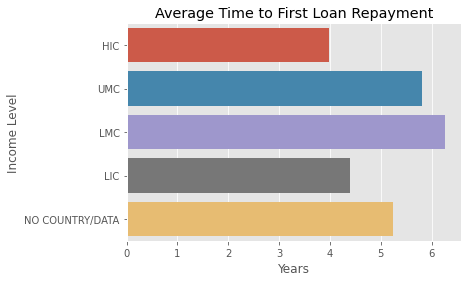

In [59]:
# Figure 1

x_ = repaid_loans_df_time.groupby('Income Level')['Years to First Repayment'].mean()
y_ = repaid_loans_df_time['Income Level'].unique()

_ = sns.barplot(x=x_, y=y_, order=income_order).set(title='Average Time to First Loan Repayment', 
                                                    xlabel='Years', 
                                                    ylabel='Income Level')

<b><u>Observations</u></b> (Figure 1 - Average Time to First Loan Repayment):

- This visualization shows us that, compared to high income countries, middle income countries (UMC and LMC) do tend to take longer to make the first repayment on their loans, about 2 years longer in fact. <b>This supports my initial hypothesis</b>.


- Interestingly, low income countries do not follow this pattern and take approximately the same amount of time (4 years) as high income countries to make their first repayment. One possible explanation for this would be that IBRD loans are designed to target middle income countries, not low income countries. That is the role of the World Bank's International Development Association (IDA) loans. Only <b>credit-worthy</b> low income countries, meaning those that are not likely to default on loans and are able to pay them back, can take out IBRD loans. Therefore, it is reasonable to conclude that the low income countries in this dataset of IBRD loans are intentionally selected for their ability to make repayment sooner and reliably. 


## Findings:

If we treat low income countries separately because they are issued IBRD loans using distinct criteria (credit-worthiness), the data does support my initial hypothesis: <b>on average, poorer countries take longer to start repaying their IBRD loans</b>. There is a negative correlation between income level and time until first loan repayment.

Specifically, this data shows us that lower middle income countries take the longest amount of time to start repaying them (more than 6 years), which is approximately 2 years longer than high income countries.
 
The underlying reason for this correlation is likely because high income countries have more available capital to devote to their loans, whereas the capital in poorer countries is lacking and/or tied up in other endeavours. This is a place for future research to elaborate on.

## Lessons Learned:

The knowledge I gained from doing this project:

1. Real data is very messy and cleaning is a significant part of the process of data analysis.
2. Subject-matter expertise really is a crucial part of data science. You have to understand your data and what it means to analyze it.
3. I learned how to combine elements of two datasets to expand analysis capability.
4. I learned new ways to manipulate and add columns with pandas .apply() method.
5. I explored a visualization library (seaborn), which was new for me.

———————————————————————————————————————————————————————————————————————————————————————————————————————————————————

## Supplementary Analysis:

I was interested in doing more with this data so I did an extra analysis of another metric of loan repayment behavior in relation to income level.

Here, I focus on <b>how income level (measured in Gross National Income (GNI)) impacts the amount of loan money countries sell to a 3rd party rather than directly to the original lender (i.e., the World Bank IBRD)?</b>

<b>I hypothesize that middle and low income countries sell more money to 3rd parties than high income countries do.</b>

##### What does it mean to sell part of a loan to a 3rd party?
Selling a portion of a loan to a 3rd party, like another country, is a part of a repayment strategy called <i><b>buy-down</b></i>. Here are the steps involved in buy-down:
- First, a country takes out a loan from the World Bank IBRD. This country is the borrower. The World Bank is the lender.
- Next, a different country/enitity (the third party) buys a portion of the borrower country's loan. This turns the loan into a grant that the borrower country does not have to repay with interest to the World Bank. 
- Lastly, in return the borrower country promises to implement specifed policies/projects that the third party requests.

Developing countries may use this tactic to protect themselves from high interest rates on loans and as a form of insurance that their debt will be effectively cancelled in cases where they cannot make payments. Source: (http://documents1.worldbank.org/curated/en/796631468340177673/pdf/WPS5111.pdf)

## Hypothesis:

Given the above, <b>I hypothesize that middle and low income countries sell more money to 3rd parties than high income countries</b> because they are more at risk of being unable to make loan repayments.

To represent this metrics in relation to income level, most visualizations I use in this analysis will plot the categorical data of income level against numerical data. 

In [60]:
#Prepare plotting style and defaults
%matplotlib inline
plt.style.use('ggplot')

#for plotting order of income levels - highest to lowest
income_order = ['HIC', 'UMC', 'LMC', 'LIC', 'NO COUNTRY/DATA']

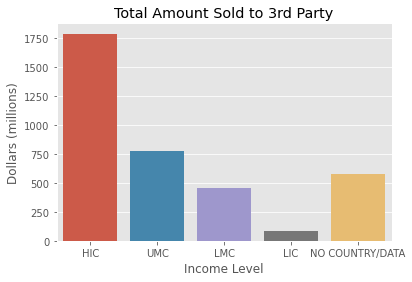

In [61]:
# Figure 1

# This will give us the total amount sold to a 3rd party by income level
x_ = repaid_loans_df['Income Level'].unique()
y_ = repaid_loans_df.groupby('Income Level')['Sold 3rd Party (millions)'].sum()

_ = sns.barplot(x=x_, y=y_, order=income_order).set(title='Total Amount Sold to 3rd Party', 
                                                xlabel='Income Level', 
                                                ylabel='Dollars (millions)')

<b><u>Observations</u></b> (Figure 1 - Total Amount Sold to 3rd Party): 

- When we add up the quantities of amount sold to a 3rd party for all the loans in the dataset, high income countries have sold the most total amount of money. <b>This is does not match my initial prediction that developing countries (UMC, LMC, LIC) should sell more total money to 3rd parties</b>. 

Let's plot this over time to see how it has been changing.



In [62]:
#Calculate portion of original principal amount sold to 3rd party
def third_party(principal_amt, third_party_amt):
    """
    calculates percent of original principal amount sold to third party
    
    Parameters:
    –––––––––––
    principal_amt: float64
    third_party_amt: float64
    
    Returns:
    ––––––––
    proportion: float64
        a percentage of a whole
    """
    
    if principal_amt == 0:
        return 0
    else:
        proportion = (third_party_amt/principal_amt)*100
        return proportion

# Add this to a new column in dataframe
percent = repaid_loans_df.apply(
    lambda row: third_party(row['Original Principal Amount (millions of dollars)'], row['Sold 3rd Party (millions)']), axis = 1).copy()
repaid_loans_df['Percentage Sold to 3rd Party'] = percent

#Limit the loans in df to those that did sell a portion to a 3rd party
percent_third_party_nonzero = repaid_loans_df.loc[repaid_loans_df['Percentage Sold to 3rd Party'] != 0].copy()

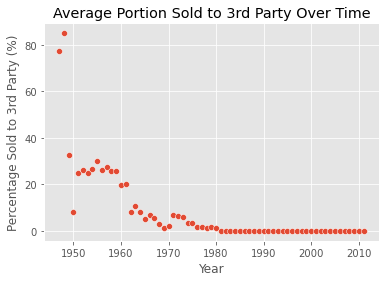

In [63]:
# Figure 2

# avg percent over time 
repaid_loans_df_sorted_time = repaid_loans_df.sort_values(by='Board Approval Date_corrected')
repaid_loans_df_sorted_time['Year'] = [element.year for element in repaid_loans_df_sorted_time['Board Approval Date_corrected']]

x_ = repaid_loans_df_sorted_time['Board Approval Date_corrected'].dt.year.unique()
y_ = repaid_loans_df_sorted_time.groupby('Year')['Percentage Sold to 3rd Party'].mean()

_ = sns.scatterplot(x=x_, y=y_).set(title='Average Portion Sold to 3rd Party Over Time', 
                                    xlabel='Year', 
                                    ylabel='Percentage Sold to 3rd Party (%)')

<b><u>Observations</u></b> (Figure 2 - Average Portion Sold to 3rd Party Over Time): 

- The first couple of datapoints (1947-1948) seem to be <b>outliers</b>. These might be impacting any underlying trends in our first figure.
- Make note of that fact that the percent goes to 0 after 1980. This will be relevant later.

Let's isolate these first few years to see what is happening.

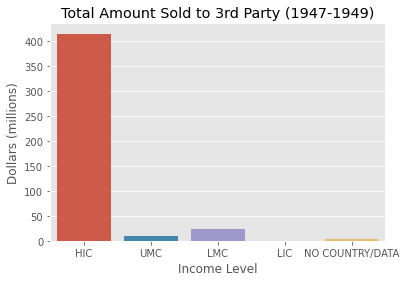

In [64]:
# Figure 3

recent_repaid_loans_df = repaid_loans_df.copy()
recent_repaid_loans_df = recent_repaid_loans_df.loc[recent_repaid_loans_df['Board Approval Date_corrected'] < '1950-01-01']

x_ = recent_repaid_loans_df['Income Level'].unique()
y_ = recent_repaid_loans_df.groupby('Income Level')['Sold 3rd Party (millions)'].sum()

_ = sns.barplot(x=x_, y=y_, order=income_order).set(title='Total Amount Sold to 3rd Party (1947-1949)', 
                                                xlabel='Income Level', 
                                                ylabel='Dollars (millions)')

<b><u>Observations</u></b> (Figure 3 - Total Amount Sold to 3rd Party (1947-1949)): 

- Practically all of the loan money sold to a 3rd party is from high income countries during this time.
- One likely explanation of this is the reconstruction of Western Europe after WWII. The World Bank's primary job at this time was to finance the reconstruction of countries like France, despite being a high income country. Furthermore, the loans during this time were quite large (e.g., $250 million), which is likely <b>inflating</b> the amount of money sold to 3rd parties by high income countries (https://www.worldbank.org/en/news/press-release/1963/08/02/first-world-bank-loan-sold-in-its-entirety).

Let's exclude these exceptional datapoints in the years just after the end of WWII and rexamine. 

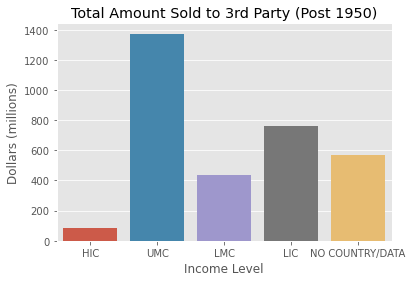

In [65]:
# Figure 4 (This is the equivalent of Figure 1, but excluding pre-1950 years)

# This will give us the total amount sold to a 3rd party by income level
recent_repaid_loans_df = repaid_loans_df.copy()
recent_repaid_loans_df = recent_repaid_loans_df.loc[recent_repaid_loans_df['Board Approval Date_corrected'] >= '1950-01-01']

x_ = recent_repaid_loans_df['Income Level'].unique()
y_ = recent_repaid_loans_df.groupby('Income Level')['Sold 3rd Party (millions)'].sum()

_ = sns.barplot(x=x_, y=y_, order=income_order).set(title='Total Amount Sold to 3rd Party (Post 1950)', 
                                                xlabel='Income Level', 
                                                ylabel='Dollars (millions)')

<b><u>Observations</u></b> (Figure 4 - Total Amount Sold to 3rd Party (Post 1950)): 

- Now that the exceptional circumstances surrounding post-WWII Western Europe are not included in the data, we see more accurate representation of the data. 
- Middle and low income (developing) countries in total have sold substantially more loan money to 3rd parties than high income (developed) countries. Upper middle income countries alone sold almost $1.4 billion via this buy-down.

The unique circumstances of WWII recovery help explain the initial misrepresentation in Figure 1 because it accounts for the fact that a very small portion of all the loans were taken out by high income countries, and yet they sold the most to 3rd parties. <u>High income Western European countries were recovering from WWII and used buy-down, selling an average of 80% of their loans, since they could not pay them.</u>

<b>The data in Figure 6 supports my hypothesis that developing countries (UMC, LMC, LIC) sell more money to 3rd parties via buy-down</b>.
 

## Findings for Supplemental Analysis:

What we learned:


1. Post-1950, developing countries (especially upper-middle income countries) have sold the most absolute amount of loan money to 3rd parties via buy-down.
4. In the late 1970s/early 1980s, the practice of selling to a 3rd party ended (see Figure 4-repeated below). This is likely due to the World Bank's sweeping structural and regulatory reforms in response to the global economic recessions at the time. One of the goals of reform was to re-incentivize developing countries to pay back their loans. 

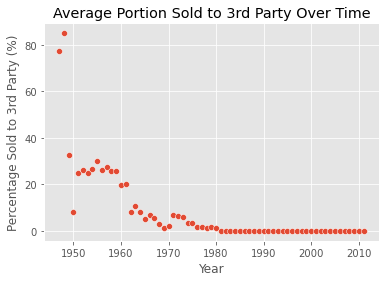

In [66]:
#Repeat of Figure 2 to show change in buy-down behavior at 1980

x_ = repaid_loans_df_sorted_time['Board Approval Date_corrected'].dt.year.unique()
y_ = repaid_loans_df_sorted_time.groupby('Year')['Percentage Sold to 3rd Party'].mean()

_ = sns.scatterplot(x=x_, y=y_).set(title='Average Portion Sold to 3rd Party Over Time', 
                                    xlabel='Year', 
                                    ylabel='Percentage Sold to 3rd Party (%)')

#### Effect of Reforms:

We can see the effect of these 1980 reforms by looking at the average interest rate for IBRD loans. From 1947 to about 1980, the average interest rate on an IBRD loan was increasing, but after 1980 there is a noticable and steady decline. This suggests that the <b>World Bank's reforms were successful in bringing loan interest rates down, thus ending the need for buy-down</b>. Developing countries could pay back their loans themselves and did not need the insurance that comes with selling to a 3rd party because they could.

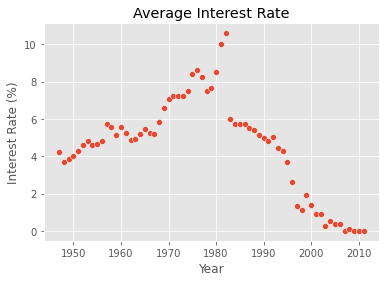

In [67]:
repaid_loans_df_avg_int_rt = repaid_loans_df.sort_values(by='Board Approval Date_corrected')
repaid_loans_df_avg_int_rt['Year'] = [element.year for element in repaid_loans_df_avg_int_rt['Board Approval Date_corrected']]

x_ = repaid_loans_df_avg_int_rt['Board Approval Date_corrected'].dt.year.unique()
y_ = repaid_loans_df_avg_int_rt.groupby('Year')['Interest Rate'].mean()

_ = sns.scatterplot(x=x_, y=y_).set(title='Average Interest Rate',
                                xlabel='Year', 
                                ylabel='Interest Rate (%)')